In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Data Description
* ID : Unique ID of each customer
* Year_Birth : Age of the customer
* Education : Customer's level of education
* Marital_Status : Customer's marital status
* Kidhome : Number of small children in customer's household
* Teenhome : Number of teenagers in customer's household
* Income : Customer's yearly household income
* Recency : Number of days since the last purchase
* MntFishProducts : The amount spent on fish products in the last 2 years
* MntMeatProducts : The amount spent on meat products in the last 2 years
* MntFruits : The amount spent on fruits products in the last 2 years
* MntSweetProducts : Amount spent on sweet products in the last 2 years
* MntWines : The amount spent on wine products in the last 2 years
* MntGoldProds : The amount spent on gold products in the last 2 years
* NumDealsPurchases : Number of purchases made with discount
* NumCatalogPurchases : Number of purchases made using catalog (buying goods to be shipped through the mail)
* NumStorePurchases : Number of purchases made directly in stores
* NumWebPurchases : Number of purchases made through the company's website
* NumWebVisitsMonth : Number of visits to company's website in the last month
* AcceptedCmp1 : 1 if customer accepted the offer in the first campaign, 0 otherwise
* AcceptedCmp2 : 1 if customer accepted the offer in the second campaign, 0 otherwise
* AcceptedCmp3 : 1 if customer accepted the offer in the third campaign, 0 otherwise
* AcceptedCmp4 : 1 if customer accepted the offer in the fourth campaign, 0 otherwise
* AcceptedCmp5 : 1 if customer accepted the offer in the fifth campaign, 0 otherwise
* AcceptedCmp6 : 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain : 1 If the customer complained in the last 2 years, 0 otherwise
* Country: Country customer belongs to

In [2]:
df = pd.read_csv("Marketing_Campaign_Dataset.csv")

print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1,1978,Master,Single,491796.22,1,0,2013-12-26,31,1364,...,14,1,1,0,0,0,0,3,11,1
1,2,1974,Master,Married,513926.78,1,0,2014-05-04,23,1275,...,5,1,1,0,0,0,0,3,11,1
2,3,1972,Graduation,Alone,521309.22,2,2,2013-02-15,93,62,...,1,1,0,0,0,1,0,3,11,1
3,4,1911,PhD,YOLO,231628.91,1,0,2013-06-12,13,251,...,14,0,1,1,0,1,0,3,11,0
4,5,1931,2n Cycle,Divorced,223936.10,1,1,2013-05-30,65,670,...,13,1,0,0,1,1,0,3,11,0


# Descriptive Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   100279 non-null  int64  
 1   Year_Birth           100279 non-null  int64  
 2   Education            100279 non-null  object 
 3   Marital_Status       100279 non-null  object 
 4   Income               100279 non-null  float64
 5   Kidhome              100279 non-null  int64  
 6   Teenhome             100279 non-null  int64  
 7   Dt_Customer          100279 non-null  object 
 8   Recency              100279 non-null  int64  
 9   MntWines             100279 non-null  int64  
 10  MntFruits            100279 non-null  int64  
 11  MntMeatProducts      100279 non-null  int64  
 12  MntFishProducts      100279 non-null  int64  
 13  MntSweetProducts     100279 non-null  int64  
 14  MntGoldProds         100279 non-null  int64  
 15  NumDealsPurchases

In [4]:
# Checking shape of dataframe
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns {df.shape[1]}')

Number of rows: 100279
Number of columns 29


In [5]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

- There are no missing values

In [6]:
df.nunique()

ID                     100279
Year_Birth                103
Education                   5
Marital_Status              8
Income                 100209
Kidhome                     3
Teenhome                    3
Dt_Customer               663
Recency                    99
MntWines                 1493
MntFruits                 199
MntMeatProducts          1725
MntFishProducts           259
MntSweetProducts          263
MntGoldProds              362
NumDealsPurchases          15
NumWebPurchases            27
NumCatalogPurchases        28
NumStorePurchases          13
NumWebVisitsMonth          20
AcceptedCmp3                2
AcceptedCmp4                2
AcceptedCmp5                2
AcceptedCmp1                2
AcceptedCmp2                2
Complain                    2
Z_CostContact               1
Z_Revenue                   1
Response                    2
dtype: int64

In [7]:
for i in df:
    print(i)
    print(df[i].unique(), '\n')

ID
[     1      2      3 ... 100277 100278 100279] 

Year_Birth
[1978 1974 1972 1911 1931 1929 1922 1905 1990 1927 1961 1966 1975 1959
 1942 1924 1988 1952 1968 1900 1893 1958 1964 1894 1930 1921 1981 1955
 1935 1982 1995 1944 1950 1969 1989 1939 1913 1941 1910 1909 1937 1947
 1908 1987 1933 1898 1932 1904 1928 1902 1906 1991 1976 1954 1903 1899
 1946 1960 1895 1948 1918 1963 1938 1923 1951 1914 1916 1936 1949 1896
 1912 1985 1984 1992 1917 1983 1971 1980 1962 1994 1920 1940 1915 1926
 1979 1901 1953 1977 1943 1945 1993 1897 1965 1956 1957 1986 1919 1907
 1970 1973 1925 1967 1934] 

Education
['Master' 'Graduation' 'PhD' '2n Cycle' 'Basic'] 

Marital_Status
['Single' 'Married' 'Alone' 'YOLO' 'Divorced' 'Together' 'Widow' 'Absurd'] 

Income
[491796.22 513926.78 521309.22 ... 410351.37  64094.5   96606.74] 

Kidhome
[1 2 0] 

Teenhome
[0 2 1] 

Dt_Customer
['2013-12-26' '2014-05-04' '2013-02-15' '2013-06-12' '2013-05-30'
 '2014-01-31' '2013-02-13' '2013-09-12' '2013-08-28' '2013-03-16'
 

In [8]:

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   100279 non-null  int64         
 1   Year_Birth           100279 non-null  int64         
 2   Education            100279 non-null  object        
 3   Marital_Status       100279 non-null  object        
 4   Income               100279 non-null  float64       
 5   Kidhome              100279 non-null  int64         
 6   Teenhome             100279 non-null  int64         
 7   Dt_Customer          100279 non-null  datetime64[ns]
 8   Recency              100279 non-null  int64         
 9   MntWines             100279 non-null  int64         
 10  MntFruits            100279 non-null  int64         
 11  MntMeatProducts      100279 non-null  int64         
 12  MntFishProducts      100279 non-null  int64         
 13  MntSweetProduc

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_15280\3388022415.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)


- The dataset consists of 30 columns and 2,240 rows of data.
- The dataset contains a variety of data types, including int64, object, and float64.
- There are some columns with null values, specifically:
 

# checking duplicated data

In [9]:
df['ID'].duplicated().sum()

np.int64(0)

**Key Takeaways:**

There is no duplicate data, so handling duplicate data is not necessary.

In [10]:
import numpy as np

# Print the number of rows before filtering outliers
print(f'Number of rows before filtering outliers: {len(df)}')

# Create a boolean mask, assuming all rows are initially valid (True)
filtered_entries = np.array([True] * len(df))

# Define columns to check for outliers
columns_to_filter = ['Year_Birth', 'Income', 'MntMeatProducts', 'MntSweetProducts', 
                     'NumWebPurchases', 'NumCatalogPurchases']

# Loop through each column and apply the IQR method
for col in columns_to_filter:
    Q1 = df[col].quantile(0.25)  # 25th percentile (Lower quartile)
    Q3 = df[col].quantile(0.75)  # 75th percentile (Upper quartile)
    IQR = Q3 - Q1  # Interquartile range

  
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)


    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries


df1 = df[filtered_entries]

# Print the number of rows after filtering
print(f'Number of rows after filtering outliers: {len(df1)}')


Number of rows before filtering outliers: 100279
Number of rows after filtering outliers: 100279


- The IQR method didn’t detect any values as outliers—this could happen if the data is naturally well-distributed.
- Outliers exist but are within the IQR threshold (not extreme enough to be removed).

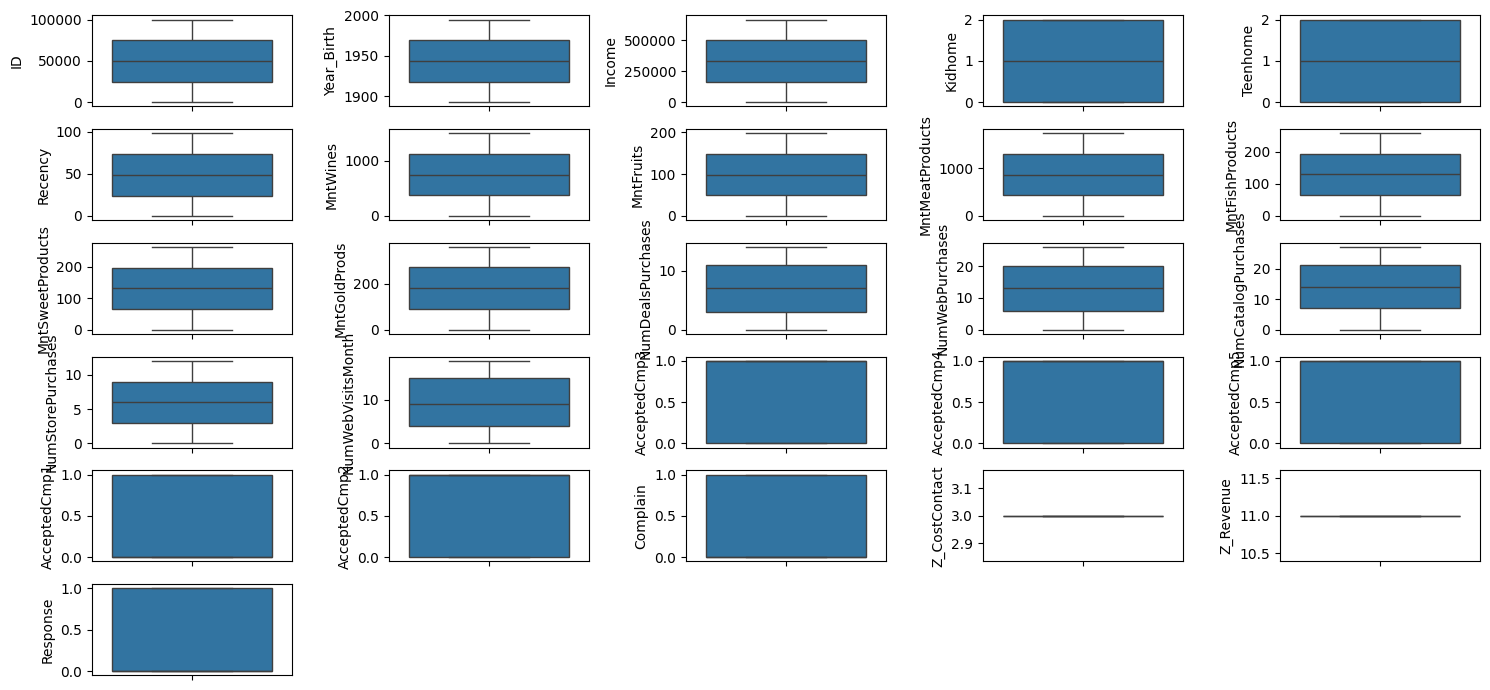

In [11]:
nums = df1.loc[:, (df1.dtypes == 'int64') | (df1.dtypes == 'float64')].columns.tolist()
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(6, 5, i+1)
    sns.boxplot(y=df1[nums[i]], orient='v')
    plt.tight_layout()

In [12]:
df_engine = df.copy()
df_engine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   100279 non-null  int64         
 1   Year_Birth           100279 non-null  int64         
 2   Education            100279 non-null  object        
 3   Marital_Status       100279 non-null  object        
 4   Income               100279 non-null  float64       
 5   Kidhome              100279 non-null  int64         
 6   Teenhome             100279 non-null  int64         
 7   Dt_Customer          100279 non-null  datetime64[ns]
 8   Recency              100279 non-null  int64         
 9   MntWines             100279 non-null  int64         
 10  MntFruits            100279 non-null  int64         
 11  MntMeatProducts      100279 non-null  int64         
 12  MntFishProducts      100279 non-null  int64         
 13  MntSweetProduc

In [13]:
# Membership_Age
df_engine['Membership_Age'] = 2014 - df_engine['Dt_Customer'].dt.year

# Customer_Age
df_engine['Customer_Age'] = 2014 - df_engine['Year_Birth']

# Age_Category
df_engine['Age_Categories'] = np.where(df_engine['Customer_Age'] < 40, 'Young Adult',
                              np.where(df_engine['Customer_Age'] < 60, 'Middle-Aged Adult',
                               'Old Adult'))

# Total_Acceptance
df_engine['Total_Acceptance'] = df_engine['AcceptedCmp1'] + df_engine['AcceptedCmp2'] + df_engine['AcceptedCmp3'] + df_engine['AcceptedCmp4'] + df_engine['AcceptedCmp5']

# Total_Children
df_engine['Total_Children'] = df_engine['Kidhome'] + df_engine['Teenhome']

# Total_Transaction
df_engine['Total_Transaction'] = df_engine['NumCatalogPurchases'] + df_engine['NumWebPurchases'] + df_engine['NumStorePurchases'] + df_engine['NumDealsPurchases']

# Total_Spending
df_engine['Total_Spending'] = df_engine['MntFishProducts'] + df_engine['MntMeatProducts'] + df_engine['MntFruits'] + df_engine['MntSweetProducts'] + df_engine['MntGoldProds']

# Conversion_Rate
def cvr(x,y):
    if y == 0:
        return 0
    return x / y
df_engine['CVR'] = round(df_engine.apply(lambda x: cvr(x['Total_Transaction'],x['NumWebVisitsMonth']), axis=1), 2)

df_engine.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Membership_Age,Customer_Age,Age_Categories,Total_Acceptance,Total_Children,Total_Transaction,Total_Spending,CVR
0,1,1978,Master,Single,491796.22,1,0,2013-12-26,31,1364,...,11,1,1,36,Young Adult,2,1,28,1521,2.00
1,2,1974,Master,Married,513926.78,1,0,2014-05-04,23,1275,...,11,1,0,40,Middle-Aged Adult,2,1,31,931,6.20
2,3,1972,Graduation,Alone,521309.22,2,2,2013-02-15,93,62,...,11,1,1,42,Middle-Aged Adult,2,4,57,1316,57.00
3,4,1911,PhD,YOLO,231628.91,1,0,2013-06-12,13,251,...,11,0,1,103,Old Adult,3,1,51,1835,3.64
4,5,1931,2n Cycle,Divorced,223936.10,1,1,2013-05-30,65,670,...,11,0,1,83,Old Adult,3,2,35,1111,2.69


In [14]:
df_engine['Dt_Customer'] = pd.to_datetime(df_engine['Dt_Customer'])
df_engine['Dt_Customer'].dt.year.max()

np.int32(2014)

In [15]:
df_engine.drop(df_engine[df_engine['Customer_Age'] > 100].index, inplace=True)

In [16]:
print(f'min age: {df_engine.Customer_Age.min()}')
print(f'max age: {df_engine.Customer_Age.max()}')

min age: 19
max age: 100


In [17]:
# List of columns to drop
columns_to_drop = [
    'Dt_Customer', 'Year_Birth',  
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'Kidhome', 'Teenhome',  
    'NumCatalogPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumDealsPurchases',  
    'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntGoldProds',  
    'NumWebVisitsMonth' 
]

# Drop columns that exist in the DataFrame
df_engine.drop(columns=[col for col in columns_to_drop if col in df_engine.columns], inplace=True)

# Verify remaining columns
df_engine.head()


,ID,Education,Marital_Status,Income,Recency,MntWines,Complain,Z_CostContact,Z_Revenue,Response,Membership_Age,Customer_Age,Age_Categories,Total_Acceptance,Total_Children,Total_Transaction,Total_Spending,CVR
0,1,Master,Single,491796.22,31,1364,0,3,11,1,1,36,Young Adult,2,1,28,1521,2.00
1,2,Master,Married,513926.78,23,1275,0,3,11,1,0,40,Middle-Aged Adult,2,1,31,931,6.20
2,3,Graduation,Alone,521309.22,93,62,0,3,11,1,1,42,Middle-Aged Adult,2,4,57,1316,57.00
4,5,2n Cycle,Divorced,223936.10,65,670,0,3,11,0,1,83,Old Adult,3,2,35,1111,2.69
5,6,2n Cycle,Alone,548686.70,9,110,0,3,11,1,0,85,Old Adult,2,2,44,1008,2.59


In [18]:
# Drop 'MntWines' if it exists in the DataFrame
if 'MntWines' in df_engine.columns:
    df_engine.drop(columns=['MntWines'], inplace=True)

# Verify remaining columns
df_engine.head()


,ID,Education,Marital_Status,Income,Recency,Complain,Z_CostContact,Z_Revenue,Response,Membership_Age,Customer_Age,Age_Categories,Total_Acceptance,Total_Children,Total_Transaction,Total_Spending,CVR
0,1,Master,Single,491796.22,31,0,3,11,1,1,36,Young Adult,2,1,28,1521,2.00
1,2,Master,Married,513926.78,23,0,3,11,1,0,40,Middle-Aged Adult,2,1,31,931,6.20
2,3,Graduation,Alone,521309.22,93,0,3,11,1,1,42,Middle-Aged Adult,2,4,57,1316,57.00
4,5,2n Cycle,Divorced,223936.10,65,0,3,11,0,1,83,Old Adult,3,2,35,1111,2.69
5,6,2n Cycle,Alone,548686.70,9,0,3,11,1,0,85,Old Adult,2,2,44,1008,2.59


# explorative data analysis

### Statistical descriptive

#### data split

In [19]:
df_eda = df_engine.copy()

In [20]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79919 entries, 0 to 100278
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 79919 non-null  int64  
 1   Education          79919 non-null  object 
 2   Marital_Status     79919 non-null  object 
 3   Income             79919 non-null  float64
 4   Recency            79919 non-null  int64  
 5   Complain           79919 non-null  int64  
 6   Z_CostContact      79919 non-null  int64  
 7   Z_Revenue          79919 non-null  int64  
 8   Response           79919 non-null  int64  
 9   Membership_Age     79919 non-null  int32  
 10  Customer_Age       79919 non-null  int64  
 11  Age_Categories     79919 non-null  object 
 12  Total_Acceptance   79919 non-null  int64  
 13  Total_Children     79919 non-null  int64  
 14  Total_Transaction  79919 non-null  int64  
 15  Total_Spending     79919 non-null  int64  
 16  CVR                79919 n

In [21]:
# numerical feature
num = df_eda.loc[:, (df_eda.dtypes == 'int64') | (df_eda.dtypes == 'float64')].columns.tolist()
num = num[3:]
print(num)
print(len(num))

['Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Customer_Age', 'Total_Acceptance', 'Total_Children', 'Total_Transaction', 'Total_Spending', 'CVR']
10


In [22]:
# categorical fearure
cat = df_eda.loc[:, (df_eda.dtypes == 'object')].columns.tolist()
print(cat)

['Education', 'Marital_Status', 'Age_Categories']


#### Statistical summary

In [23]:
# Statistic Numerical Data
n_feats = ['Income', 'Recency', 'Membership_Age', 'Customer_Age', 'Total_Children', 'Total_Transaction', 'Total_Spending', 'Total_Acceptance', 'CVR']
df_eda[n_feats].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Income,79919.0,333083.21,191786.61,1735.1,167616.22,331764.46,498256.7,666664.13
Recency,79919.0,49.00,28.55,0.0,24.00,49.00,74.0,98.00
Membership_Age,79919.0,0.97,0.69,0.0,0.00,1.00,1.0,2.00
Customer_Age,79919.0,59.39,23.63,19.0,39.00,59.00,80.0,100.00
Total_Children,79919.0,2.00,1.16,0.0,1.00,2.00,3.0,4.00
Total_Transaction,79919.0,39.53,12.58,1.0,31.00,40.00,48.0,77.00
Total_Spending,79919.0,1402.38,524.64,73.0,972.00,1400.00,1835.0,2719.00
Total_Acceptance,79919.0,2.50,1.12,0.0,2.00,3.00,3.0,5.00
CVR,79919.0,6.99,9.34,0.0,2.41,3.76,7.2,75.00


### Summary:

- The average customer has an annual income of Rp333,083.
- Most customers shop again approximately 1.5 months after their last purchase.
- The majority of customers have been members for 1 year.
- Most customers are around 59 years old.
- The majority of customers have 2 children.
- Most customers make 40 transactions.
- On average, customers spend Rp1,402 on shopping.
- The average number of accepted campaigns is 2.5.
- The conversion rate from website visits to purchases is 6.99%.

In [24]:
# Statistic Categorical Data
df_eda[cat].describe().T

,count,unique,top,freq
Education,79919,5,Basic,16106
Marital_Status,79919,8,Married,10096
Age_Categories,79919,3,Old Adult,39804


### Univariate analysis

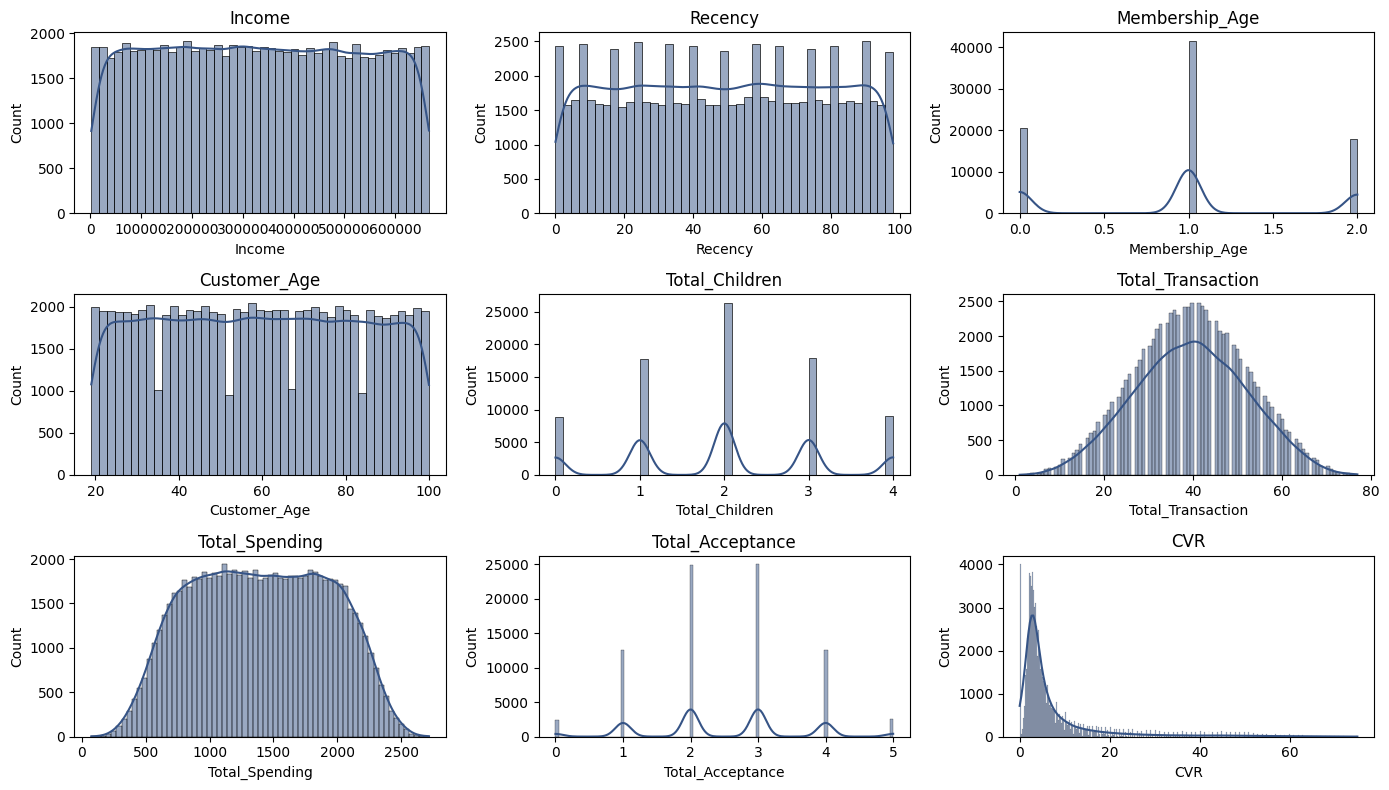

In [25]:


plt.figure(figsize=(14, 8))

# Define number of rows and columns dynamically based on the number of features
num_features = len(n_feats)
rows = (num_features // 3) + (num_features % 3 > 0)  # Ensures enough rows

for i, feature in enumerate(n_feats):
    plt.subplot(rows, 3, i+1)
    sns.histplot(df_eda[feature], color='#365486', kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()


### Key Takeaways from the Distribution Plots:

- The distribution of Total_Transaction follows a normal distribution.
- The distributions of Total_Spending and CVR are positively skewed.
- Income, Recency, and Customer_Age appear uniformly distributed with noticeable gaps.
- Membership_Age, Total_Children, and Total_Acceptance show distinct peaks, indicating discrete values rather than continuous distributions.

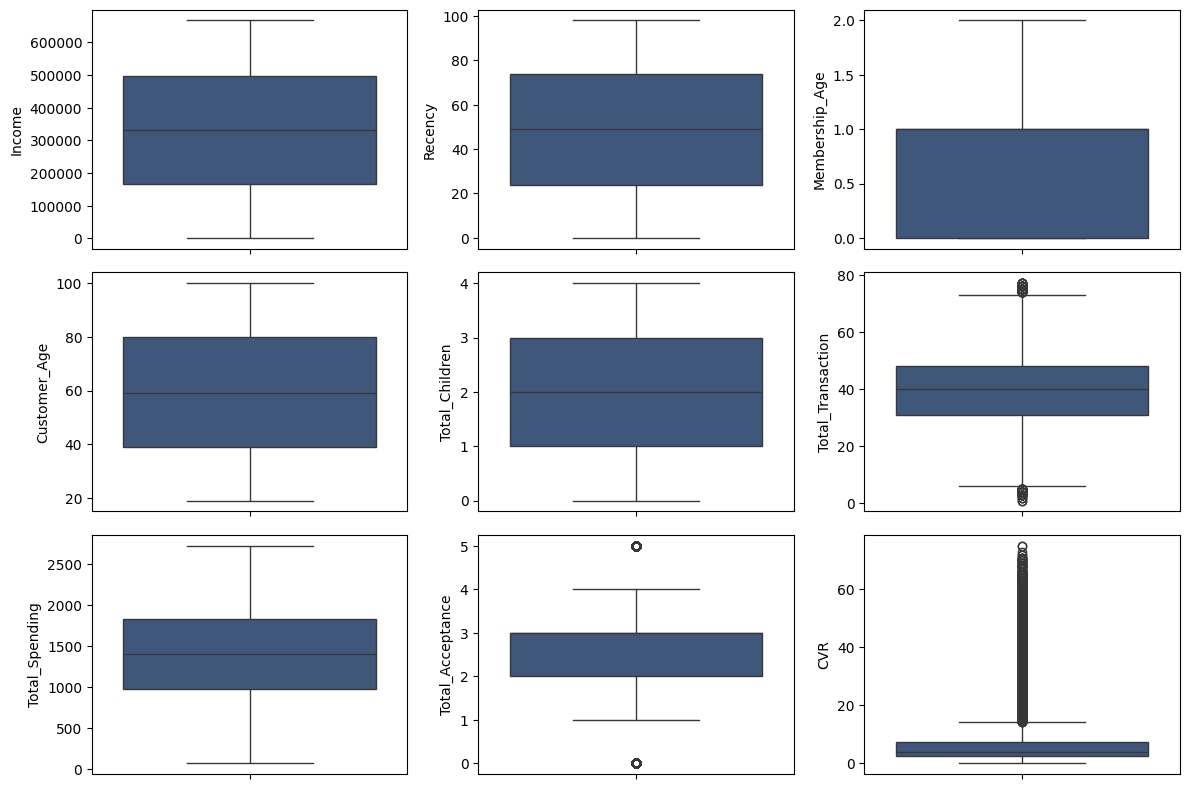

In [26]:
plt.figure(figsize=(12, 8))
for i in range(len(n_feats)):  # No need for (0, len(n_feats))
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df_eda[n_feats[i]], color='#365486')
plt.tight_layout()  # Move this outside the loop
plt.show()  # To ensure the plot is displayed properly


## Key Takeaways:

- Most features contain outliers, as seen in the boxplots.
- Extreme values are particularly noticeable in Total_Transaction, Total_Acceptance, and CVR.

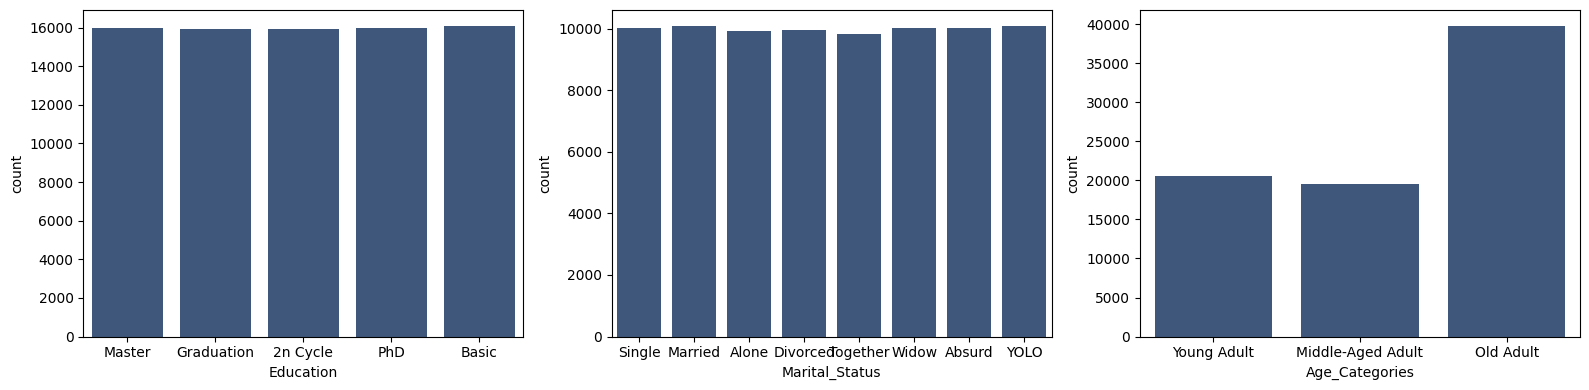

In [27]:
# Distribution Categorical Features

plt.figure(figsize = (16, 4))
for i in range(0, len(cat)):
    plt.subplot(1, 3, i+1)
    sns.countplot(x = df_eda[cat[i]], color = '#365486', orient = 'v')
    plt.tight_layout()

# Bivariate Analysis

#### Conversion Rate vs Income, Spending, and Age
#### At this stage, an analysis will be conducted to examine the relationship between Conversion Rate and income, total spending, and customer age.








In [28]:
variable = ['Income', 'Total_Spending', 'Customer_Age']

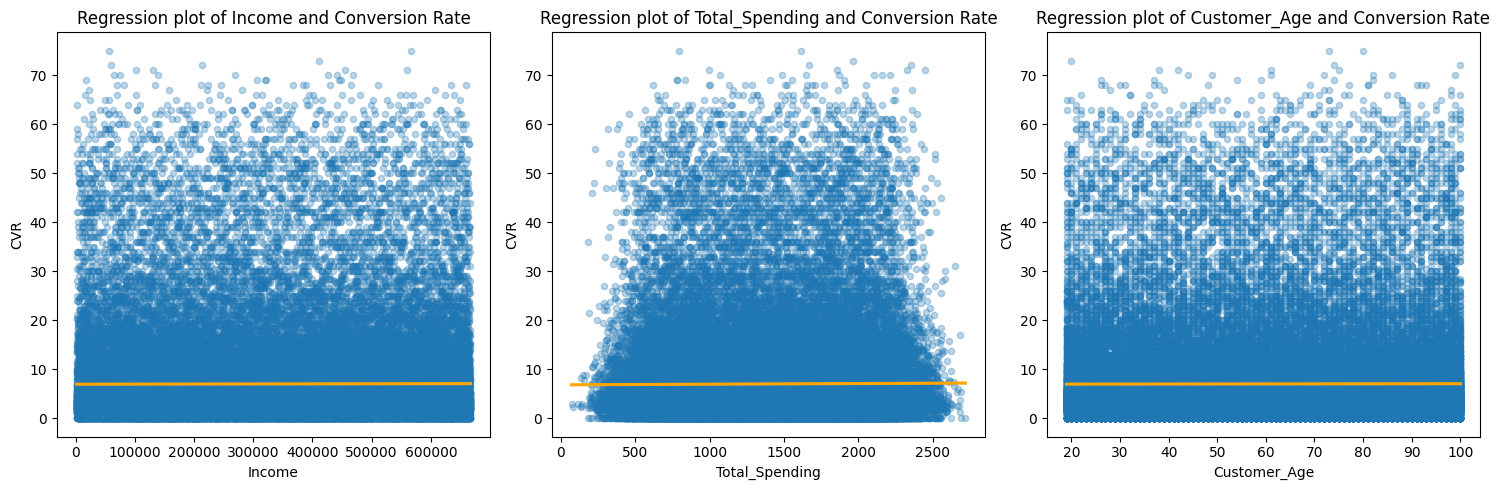

In [29]:
plt.figure(figsize = (15, 5))
for var in range(0, len(variable)):
    plt.subplot(1, 3, var+1)
    sns.regplot(x = df_eda[variable[var]], y='CVR', data = df_eda, scatter_kws={'s':20, 'alpha':0.3},
                line_kws={'color':'orange'}).set(title=f'Regression plot of {variable[var]} and Conversion Rate')
    plt.tight_layout()

## Key Takeaways:
- None of the three variables (Income, Total Spending, Customer Age) show a strong correlation with the Conversion Rate.
- The orange regression line being almost flat in all plots indicates that these factors are not strong predictors of conversion.

### Multivariate analysis

<Axes: >

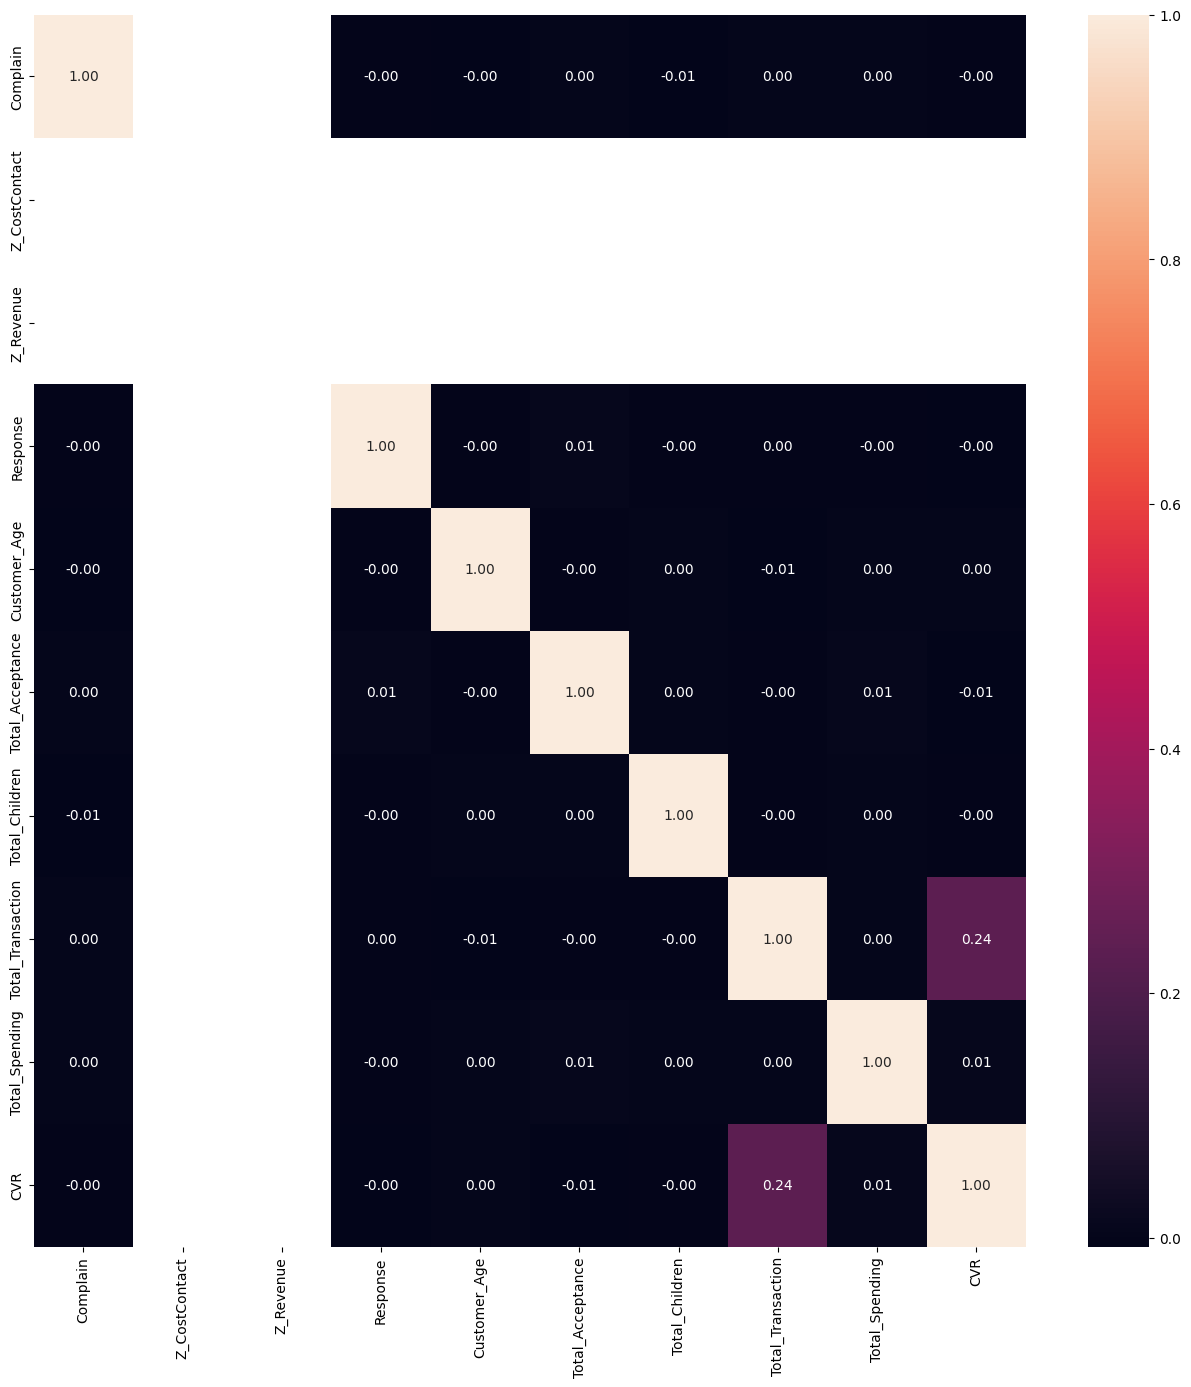

In [30]:
# Heatmap Num Correlation
plt.figure(figsize=(16, 16))
sns.heatmap(df_eda[num].corr(), color = '#365486', annot=True, fmt='.2f')

In [31]:
# Heatmap Num Correlation
from scipy.stats import chi2_contingency

def cat_vs_resp(column):
    resp_by = df_eda.groupby(column)['Response'].value_counts(normalize = True).to_frame()
    resp_by.columns = ['Proportion']
    resp_by_pvt = resp_by.reset_index().pivot(columns = 'Response', index = column, values = 'Proportion')
    display(resp_by_pvt * 100)

    contingency = df_eda.groupby([column, 'Response']).agg({'Response': 'count'}).rename(columns={'Response': 'count'}).reset_index().pivot(index = column, columns = 'Response', values = 'count')
    stats, p, dof, expected = chi2_contingency(contingency)
    if p < 0.5:
        print(f'Column {column} has a strong relationship with the Response Label.')
    else:
        print(f'Column {column} has a weak relationship with the Response Label.')

    resp_by_pvt.plot(kind = 'bar', stacked = True, ylabel = 'Proportion')
    plt.title(f'Response Proportion by {column}')
    plt.show()


Response,0,1
Education,,
2n Cycle,50.470928,49.529072
Basic,49.714392,50.285608
Graduation,49.868206,50.131794
Master,50.810642,49.189358
PhD,49.148830,50.851170


Column Education has a strong relationship with the Response Label.


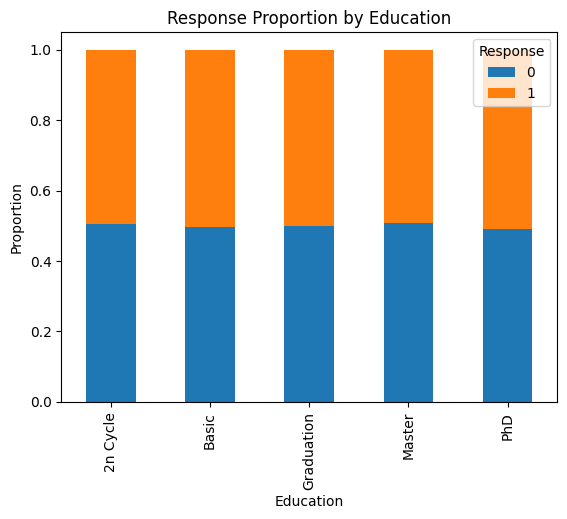

Response,0,1
Marital_Status,,
Absurd,50.429570,49.570430
Alone,49.863925,50.136075
Divorced,49.869478,50.130522
Married,50.485341,49.514659
Single,49.400120,50.599880
Together,50.091631,49.908369
Widow,50.853208,49.146792
YOLO,49.023496,50.976504


Column Marital_Status has a strong relationship with the Response Label.


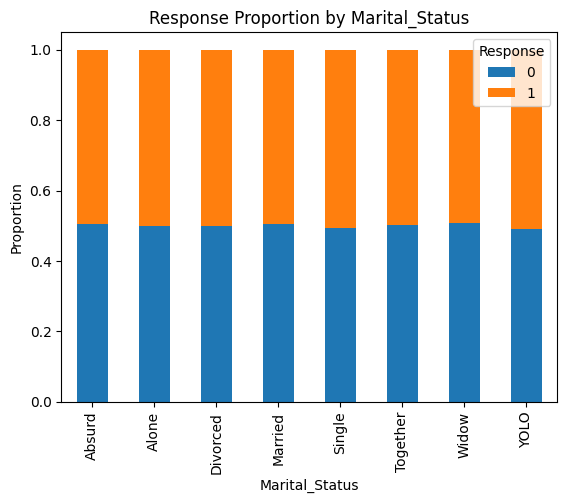

Response,0,1
Age_Categories,,
Middle-Aged Adult,49.966740,50.033260
Old Adult,50.128128,49.871872
Young Adult,49.790978,50.209022


Column Age_Categories has a weak relationship with the Response Label.


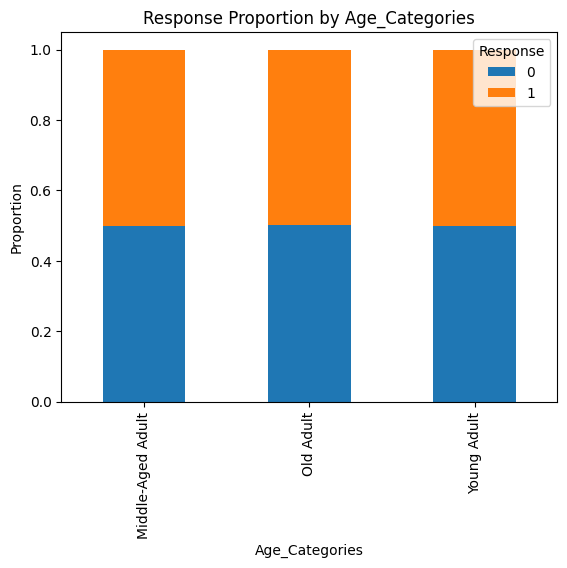

In [32]:
for col in df_eda[cat]:
    cat_vs_resp(col)

# Data Preprocessing

## Feature encoding

### LAbel encoding

In [33]:
df_prep = df_eda.copy()

In [34]:
# Education
mapping_education = {'SMA' : 0,
                     'D3' : 1,
                     'S1' : 2,
                     'S2' : 3,
                     'S3' : 4}

df_prep['Education_Enc'] = df_prep['Education'].map(mapping_education)

# Drop the original 'Education' column
df_prep = df_prep.drop('Education', axis=1)

df_prep.head()

,ID,Marital_Status,Income,Recency,Complain,Z_CostContact,Z_Revenue,Response,Membership_Age,Customer_Age,Age_Categories,Total_Acceptance,Total_Children,Total_Transaction,Total_Spending,CVR,Education_Enc
0,1,Single,491796.22,31,0,3,11,1,1,36,Young Adult,2,1,28,1521,2.00,NaN
1,2,Married,513926.78,23,0,3,11,1,0,40,Middle-Aged Adult,2,1,31,931,6.20,NaN
2,3,Alone,521309.22,93,0,3,11,1,1,42,Middle-Aged Adult,2,4,57,1316,57.00,NaN
4,5,Divorced,223936.10,65,0,3,11,0,1,83,Old Adult,3,2,35,1111,2.69,NaN
5,6,Alone,548686.70,9,0,3,11,1,0,85,Old Adult,2,2,44,1008,2.59,NaN


### One hot encoding

In [35]:
# Marital Status
df_MS = pd.get_dummies(df_prep['Marital_Status'], prefix='MS')

df_prep = pd.concat([df_prep, df_MS], axis=1)

# Drop the original 'Education' column if needed
df_prep = df_prep.drop('Marital_Status', axis=1)

df_prep.head()

,ID,Income,Recency,Complain,Z_CostContact,Z_Revenue,Response,Membership_Age,Customer_Age,Age_Categories,...,CVR,Education_Enc,MS_Absurd,MS_Alone,MS_Divorced,MS_Married,MS_Single,MS_Together,MS_Widow,MS_YOLO
0,1,491796.22,31,0,3,11,1,1,36,Young Adult,...,2.00,NaN,False,False,False,False,True,False,False,False
1,2,513926.78,23,0,3,11,1,0,40,Middle-Aged Adult,...,6.20,NaN,False,False,False,True,False,False,False,False
2,3,521309.22,93,0,3,11,1,1,42,Middle-Aged Adult,...,57.00,NaN,False,True,False,False,False,False,False,False
4,5,223936.10,65,0,3,11,0,1,83,Old Adult,...,2.69,NaN,False,False,True,False,False,False,False,False
5,6,548686.70,9,0,3,11,1,0,85,Old Adult,...,2.59,NaN,False,True,False,False,False,False,False,False


In [36]:
# Age Categories

df_AC = pd.get_dummies(df_prep['Age_Categories'], prefix='AC')

df_prep = pd.concat([df_prep, df_AC], axis=1)

# Drop the original 'Education' column if needed
df_prep = df_prep.drop('Age_Categories', axis=1)

df_prep.head()

,ID,Income,Recency,Complain,Z_CostContact,Z_Revenue,Response,Membership_Age,Customer_Age,Total_Acceptance,...,MS_Alone,MS_Divorced,MS_Married,MS_Single,MS_Together,MS_Widow,MS_YOLO,AC_Middle-Aged Adult,AC_Old Adult,AC_Young Adult
0,1,491796.22,31,0,3,11,1,1,36,2,...,False,False,False,True,False,False,False,False,False,True
1,2,513926.78,23,0,3,11,1,0,40,2,...,False,False,True,False,False,False,False,True,False,False
2,3,521309.22,93,0,3,11,1,1,42,2,...,True,False,False,False,False,False,False,True,False,False
4,5,223936.10,65,0,3,11,0,1,83,3,...,False,True,False,False,False,False,False,False,True,False
5,6,548686.70,9,0,3,11,1,0,85,2,...,True,False,False,False,False,False,False,False,True,False
